<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 17** | Árvores II (Parte II: árvore de classificação) | Exercício 1

Aluno [Roberto Hatiro Nishiyama](https://www.linkedin.com/in/rhatiro/)<br>
Data: 19 de abril de 2023.

---

# Árvores II - Tarefa I

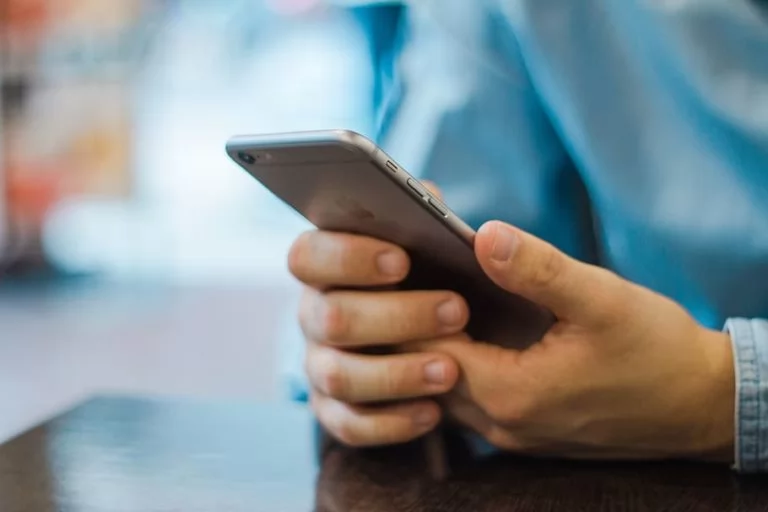  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [1]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

CPU times: user 1.52 s, sys: 365 ms, total: 1.89 s
Wall time: 3.31 s


1. Faça o download dos arquivos.

In [2]:
%%time

_features = './download/UCI HAR Dataset/features.txt'
_subject_train = './download/UCI HAR Dataset/train/subject_train.txt'
_X_train = './download/UCI HAR Dataset/train/X_train.txt'
_subject_test = './download/UCI HAR Dataset/test/subject_test.txt'
_X_test = './download/UCI HAR Dataset/test/X_test.txt'
_y_train = './download/UCI HAR Dataset/train/y_train.txt'
_y_test = './download/UCI HAR Dataset/test/y_test.txt'

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


2. Carregue a base features.txt em uma Series (por exemplo usando o comando pd.read_csv().

In [3]:
%%time

features = (pd.read_csv(filepath_or_buffer=_features, 
                        sep='?', 
                        header=None)
              .squeeze('columns'))
features

CPU times: user 6.72 ms, sys: 2.49 ms, total: 9.21 ms
Wall time: 7.77 ms


0                           1 tBodyAcc-mean()-X
1                           2 tBodyAcc-mean()-Y
2                           3 tBodyAcc-mean()-Z
3                            4 tBodyAcc-std()-X
4                            5 tBodyAcc-std()-Y
                         ...                   
556        557 angle(tBodyGyroMean,gravityMean)
557    558 angle(tBodyGyroJerkMean,gravityMean)
558                    559 angle(X,gravityMean)
559                    560 angle(Y,gravityMean)
560                    561 angle(Z,gravityMean)
Name: 0, Length: 561, dtype: object

3. Carregue a base subject_train.txt em uma Series

In [4]:
%%time

subject_train = (pd.read_csv(filepath_or_buffer=_subject_train, 
                             header=None)
                   .squeeze('columns'))
subject_train

CPU times: user 4.27 ms, sys: 1.92 ms, total: 6.19 ms
Wall time: 5.83 ms


0        1
1        1
2        1
3        1
4        1
        ..
7347    30
7348    30
7349    30
7350    30
7351    30
Name: 0, Length: 7352, dtype: int64

4. Carregue a base X_train.txt
> 1. Faça com que as colunas deste dataframe tenham os nomes indicados em features.txt
> 2. Sem alterar a ordem dos dataframes, coloque o indicador do indivíduo lido em subject_train.txt como uma variável a mais neste dataframe**
> 3. Faça com que este dataframe tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo

In [5]:
%%time

X_train = (pd.read_csv(filepath_or_buffer=_X_train, 
                       header=None, 
                       names=features, 
                       delim_whitespace=True)
             .assign(subject_train=subject_train))
X_train.set_index(keys='subject_train', 
                  drop=True, 
                  append=True, 
                  inplace=True)
X_train

CPU times: user 1.04 s, sys: 105 ms, total: 1.15 s
Wall time: 1.15 s


,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [6]:
%time print('Quantidade de valores ausentes em X_train:', X_train.isna().sum().sum())

Quantidade de valores ausentes em X_train: 0
CPU times: user 11 ms, sys: 3.94 ms, total: 14.9 ms
Wall time: 12.7 ms


5. Com a mesma lógica, carregue a base X_test
> 1. Certifique-se de que tenha os nomes lidos em features.txt
> 2. Coloque o identificador do sujeito lido em subject_test.txt
> 3. Defina um índice duplo composto pela ordem do registro e o identificador do registro

In [7]:
%%time

subject_test = (pd.read_csv(filepath_or_buffer=_subject_test, 
                            header=None)
                   .squeeze('columns'))

X_test = (pd.read_csv(filepath_or_buffer=_X_test, 
                      header=None, 
                      names=features, 
                      delim_whitespace=True)
             .assign(subject_test=subject_test))
X_test.set_index(keys='subject_test', 
                 drop=True, 
                 append=True, 
                 inplace=True)
X_test

CPU times: user 422 ms, sys: 46.2 ms, total: 469 ms
Wall time: 476 ms


,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [8]:
%time print('Quantidade de valores ausentes em X_test:', X_test.isna().sum().sum())

Quantidade de valores ausentes em X_test: 0
CPU times: user 5.38 ms, sys: 2.96 ms, total: 8.34 ms
Wall time: 6.11 ms


6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo

In [9]:
%%time

os.makedirs(name='./output', exist_ok=True)
X_train.to_csv(path_or_buf='./output/X_train.csv')
X_test.to_csv(path_or_buf='./output/X_test.csv')

CPU times: user 6.99 s, sys: 401 ms, total: 7.39 s
Wall time: 7.74 s


In [10]:
%%time

X_train = pd.read_csv('./output/X_train.csv', index_col=['Unnamed: 0', 'subject_train'])
X_test = pd.read_csv('./output/X_test.csv', index_col=['Unnamed: 0', 'subject_test'])

CPU times: user 1.11 s, sys: 115 ms, total: 1.22 s
Wall time: 1.28 s


7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

In [11]:
%%time

X_train = X_train.iloc[:,:3]
X_test = X_test.iloc[:,:3]

y_train = (pd.read_csv(filepath_or_buffer=_y_train, 
                      header=None)
             .squeeze('columns'))
y_test = (pd.read_csv(filepath_or_buffer=_y_test, 
                      header=None)
            .squeeze('columns'))

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7352, 3)
y_train: (7352,)
X_test: (2947, 3)
y_test: (2947,)
CPU times: user 5.39 ms, sys: 3.05 ms, total: 8.45 ms
Wall time: 10 ms


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.

In [12]:
%%time

print('Quantidade de variáveis utilizadas em X_train:', X_train.shape[1])
print('Quantidade de variáveis utilizadas em X_test:', X_test.shape[1])

clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
clf

Quantidade de variáveis utilizadas em X_train: 3
Quantidade de variáveis utilizadas em X_test: 3
CPU times: user 1.57 ms, sys: 1.67 ms, total: 3.24 ms
Wall time: 4.54 ms


DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.

In [13]:
%%time

path = clf.cost_complexity_pruning_path(X=X_train, y=y_train)
path

CPU times: user 32.5 ms, sys: 5.48 ms, total: 37.9 ms
Wall time: 39.8 ms


{'ccp_alphas': array([0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
        2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
        5.84401136e-05, 6.17808017e-05, 6.59866112e-05, 6.73768888e-05,
        7.02851049e-05, 7.74168145e-05, 7.99585551e-05, 8.01474017e-05,
        8.28222484e-05, 8.29342439e-05, 8.49667199e-05, 9.21474511e-05,
        9.63598696e-05, 1.02953015e-04, 1.04280015e-04, 1.05722623e-04,
        1.06211126e-04, 1.10109332e-04, 1.20580361e-04, 1.24186720e-04,
        1.32053657e-04, 1.35233977e-04, 1.36017410e-04, 1.41963138e-04,
        1.46351627e-04, 1.47352194e-04, 1.49244166e-04, 1.49492770e-04,
        1.50482754e-04, 1.51968146e-04, 1.55713461e-04, 1.60511546e-04,
        1.60628990e-04, 1.64239147e-04, 1.67323005e-04, 1.74342668e-04,
        1.74907961e-04, 1.75578030e-04, 1.78985873e-04, 1.81439304e-04,
        1.85996704e-04, 1.87333070e-04, 1.89065980e-04, 1.89796602e-04,
        1.96759215e-04, 2.01481091e-04, 2.01919050

- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [14]:
%%time

print('Tamanho total de ccp_alphas:', len(path.ccp_alphas))
print('Tamanho reduzido[::5] de ccp_alphas:', len(path.ccp_alphas[::5]))

ccp_alphas, impurities = path.ccp_alphas[::5], path.impurities[::5]

Tamanho total de ccp_alphas: 233
Tamanho reduzido[::5] de ccp_alphas: 47
CPU times: user 165 µs, sys: 124 µs, total: 289 µs
Wall time: 182 µs


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista

In [15]:
%%time

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)
    
clfs

CPU times: user 2.4 s, sys: 29.3 ms, total: 2.43 s
Wall time: 2.51 s


[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=2.849888595264009e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=6.598661121074139e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=8.01474017245638e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=9.635986956873458e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00011010933208974519, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00013601741022850914, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0001494927703823909, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00016062899036919714, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00017557802954333655, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00018906598037098836, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00020286677471008027, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00020545916743156412, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0002108269858541

- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste

In [16]:
%%time

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test,  y_test ) for clf in clfs]

print('Acurácia máxima em train_scores:', max(train_scores))
print('Acurácia máxima em test_scores:', max(test_scores))

Acurácia máxima em train_scores: 1.0
Acurácia máxima em test_scores: 0.4472344757380387
CPU times: user 211 ms, sys: 3.95 ms, total: 215 ms
Wall time: 214 ms


- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste

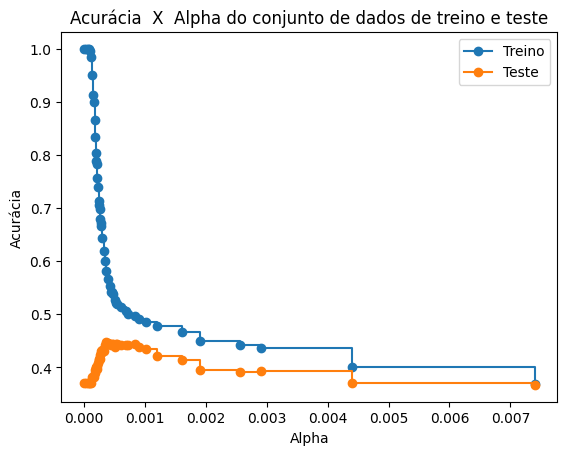

CPU times: user 315 ms, sys: 11.5 ms, total: 327 ms
Wall time: 330 ms


In [17]:
%%time

fig, ax = plt.subplots()
ax.set_xlabel(xlabel='Alpha')
ax.set_ylabel(ylabel='Acurácia')
ax.set_title(label='Acurácia  X  Alpha do conjunto de dados de treino e teste')
ax.plot(ccp_alphas, train_scores, marker='o', label='Treino', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores , marker='o', label='Teste' , drawstyle='steps-post')
ax.legend()
plt.show()

- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste

In [18]:
%%time

best_tree_index = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
print('Índice da melhor árvore:', best_tree_index)

best_tree = clfs[best_tree_index]
print('Melhor árvore:', best_tree)

Índice da melhor árvore: 25
Melhor árvore: DecisionTreeClassifier(ccp_alpha=0.00036355986671961156, random_state=42)
CPU times: user 883 µs, sys: 83 µs, total: 966 µs
Wall time: 1.02 ms


- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

A melhor acurácia que se pode obter com as três variáveis é: 0.4472344757380387
CPU times: user 77.6 ms, sys: 3.37 ms, total: 81 ms
Wall time: 81.9 ms


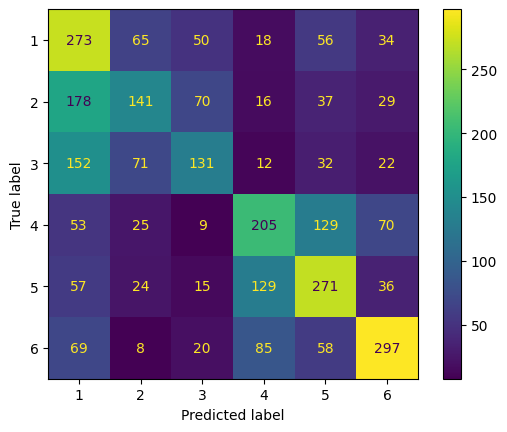

In [19]:
%%time

print('A melhor acurácia que se pode obter com as três variáveis é:', 
      best_tree.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=best_tree, X=X_test, y=y_test);

---

Quantidade de variáveis utilizadas em X_train: 561
Quantidade de variáveis utilizadas em X_test: 561
Tamanho total de ccp_alphas: 64
Acurácia máxima em train_scores: 1.0
Acurácia máxima em test_scores: 0.8788598574821853


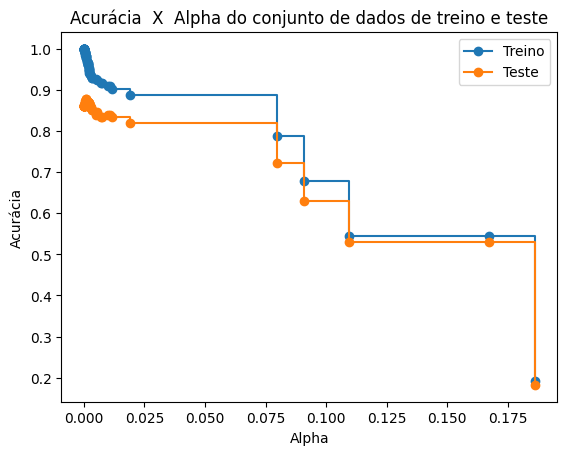

A melhor acurácia que se pode obter com todas as variáveis é: 0.8788598574821853
CPU times: user 4min 47s, sys: 1.14 s, total: 4min 48s
Wall time: 4min 49s


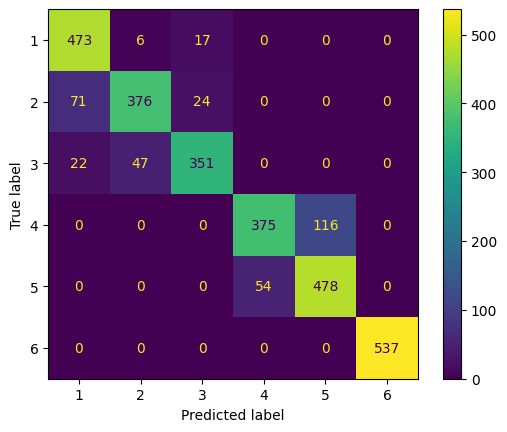

In [20]:
%%time

X_train = pd.read_csv('./output/X_train.csv', index_col=['Unnamed: 0', 'subject_train'])
X_test = pd.read_csv('./output/X_test.csv', index_col=['Unnamed: 0', 'subject_test'])

y_train = (pd.read_csv(filepath_or_buffer='./download/UCI HAR Dataset/train/y_train.txt', 
                      header=None)
             .squeeze('columns'))
y_test = (pd.read_csv(filepath_or_buffer='./download/UCI HAR Dataset/test/y_test.txt', 
                      header=None)
            .squeeze('columns'))

print('Quantidade de variáveis utilizadas em X_train:', X_train.shape[1])
print('Quantidade de variáveis utilizadas em X_test:', X_test.shape[1])

clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

path = clf.cost_complexity_pruning_path(X=X_train, y=y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
print('Tamanho total de ccp_alphas:', len(ccp_alphas))

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test,  y_test ) for clf in clfs]

print('Acurácia máxima em train_scores:', max(train_scores))
print('Acurácia máxima em test_scores:', max(test_scores))

fig, ax = plt.subplots()
ax.set_xlabel(xlabel='Alpha')
ax.set_ylabel(ylabel='Acurácia')
ax.set_title(label='Acurácia  X  Alpha do conjunto de dados de treino e teste')
ax.plot(ccp_alphas, train_scores, marker='o', label='Treino', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores , marker='o', label='Teste' , drawstyle='steps-post')
ax.legend()
plt.show()

best_tree_index = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
best_tree = clfs[best_tree_index]

print('A melhor acurácia que se pode obter com todas as variáveis é:', 
      best_tree.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=best_tree, X=X_test, y=y_test);

---